In [16]:
import pandas as pd
from pathlib import Path
import numpy as np
from datetime import datetime, timedelta
from sklearn import linear_model

In [35]:
csv_path = Path('monthly_data.csv')
monthly_df = pd.read_csv(csv_path, index_col = "Date")
monthly_df

,DXC,BBY,AMG,CNP,WMT,MRK,NEM,VFC,MDT,HST,...,UNH,HSY,FB,EIX,SBUX,MCO,HII,RL,LNT,AXP
Date,,,,,,,,,,,,,,,,,,,,,
2/27/15,23.867823,33.267136,210.686645,16.888973,74.061958,50.291893,24.401049,63.256672,69.823471,16.707489,...,105.040535,92.339218,78.970001,54.357391,42.782387,91.116180,132.023270,123.606277,27.101852,75.427559
3/31/15,22.128880,33.179913,209.090057,16.580273,73.015411,49.780846,20.141970,62.421577,70.460373,16.215014,...,109.714111,89.785667,82.220001,53.208439,43.336098,97.564026,131.290314,118.733910,26.846176,72.461044
4/30/15,21.847523,30.422970,220.139389,17.035191,69.286972,51.582237,24.576731,60.034454,67.262138,16.182875,...,103.323639,81.786682,78.769997,51.905262,45.377064,101.060547,123.271454,120.458458,25.997549,71.839569
5/31/15,21.847523,30.422970,220.139389,17.035191,69.286972,51.582237,24.576731,60.034454,67.262138,16.182875,...,103.323639,81.786682,78.769997,51.905262,45.377064,101.060547,123.271454,120.458458,25.997549,71.839569
6/30/15,22.407070,28.825178,212.808884,15.652534,63.363731,49.679543,21.693781,58.084694,67.285637,16.092331,...,113.634422,79.484596,85.769997,47.695503,49.230713,101.788795,105.818543,119.940102,24.815250,72.359734
7/31/15,22.335381,28.542316,202.392349,15.907512,64.301750,51.451008,15.945307,64.206329,71.181107,15.727145,...,113.075554,83.117447,94.010002,51.497070,53.187904,104.117599,110.348679,114.077202,26.687109,70.814239
8/31/15,21.161091,32.475834,181.500885,15.513625,58.219959,46.991810,15.852435,60.325130,65.642090,14.388148,...,107.766403,80.615135,89.430000,50.184113,50.369987,96.757385,106.214287,100.756577,24.587204,71.428711
9/30/15,21.115461,33.015205,166.460159,15.030388,58.318901,43.470867,14.947566,57.081448,61.115185,12.989917,...,108.522560,82.740372,89.900002,54.487957,52.331020,92.870461,101.091324,107.559921,25.376841,69.017326
10/31/15,21.115461,33.015205,166.460159,15.030388,58.318901,43.470867,14.947566,57.081448,61.115185,12.989917,...,108.522560,82.740372,89.900002,54.487957,52.331020,92.870461,101.091324,107.559921,25.376841,69.017326


In [36]:
daily_returns = monthly_df.pct_change()
daily_returns.dropna(inplace = True)
daily_returns

,DXC,BBY,AMG,CNP,WMT,MRK,NEM,VFC,MDT,HST,...,UNH,HSY,FB,EIX,SBUX,MCO,HII,RL,LNT,AXP
Date,,,,,,,,,,,,,,,,,,,,,
3/31/15,-0.072857,-0.002622,-0.007578,-0.018278,-0.014131,-0.010162,-0.174545,-0.013202,0.009122,-0.029476,...,0.044493,-0.027654,0.041155,-0.021137,0.012942,0.070765,-0.005552,-0.039418,-0.009434,-0.039329
4/30/15,-0.012714,-0.083091,0.052845,0.027437,-0.051064,0.036186,0.220175,-0.038242,-0.045391,-0.001982,...,-0.058247,-0.089090,-0.041961,-0.024492,0.047096,0.035838,-0.061077,0.014524,-0.031611,-0.008577
5/31/15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6/30/15,0.025611,-0.052519,-0.033299,-0.081165,-0.085489,-0.036887,-0.117304,-0.032477,0.000349,-0.005595,...,0.099791,-0.028147,0.088866,-0.081105,0.084925,0.007206,-0.141581,-0.004303,-0.045477,0.007241
7/31/15,-0.003199,-0.009813,-0.048948,0.016290,0.014804,0.035658,-0.264983,0.105392,0.057895,-0.022693,...,-0.004918,0.045705,0.096071,0.079705,0.080381,0.022879,0.042810,-0.048882,0.075432,-0.021358
8/31/15,-0.052575,0.137814,-0.103223,-0.024761,-0.094582,-0.086669,-0.005824,-0.060449,-0.077816,-0.085139,...,-0.046952,-0.030106,-0.048718,-0.025496,-0.052980,-0.070691,-0.037467,-0.116769,-0.078686,0.008677
9/30/15,-0.002156,0.016608,-0.082869,-0.031149,0.001699,-0.074927,-0.057081,-0.053770,-0.068963,-0.097179,...,0.007017,0.026363,0.005256,0.085761,0.038933,-0.040172,-0.048232,0.067523,0.032116,-0.033759
10/31/15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11/30/15,0.211552,-0.143858,0.036493,-0.046942,-0.092535,0.073294,0.145613,-0.051459,0.125485,0.049968,...,-0.028446,-0.054103,0.159511,-0.058824,0.083546,0.053642,0.226426,0.051202,0.038525,-0.029932


In [19]:
sharpe_ratio = (monthly_df.mean()) / (monthly_df.std() * np.sqrt(12))
sharpe_ratio

DXC    0.665931
BBY    0.823915
AMG    1.097986
CNP    1.361230
WMT    1.271096
         ...   
MCO    0.927984
HII    1.154338
RL     1.685028
LNT    1.366718
AXP    1.214408
Length: 100, dtype: float64

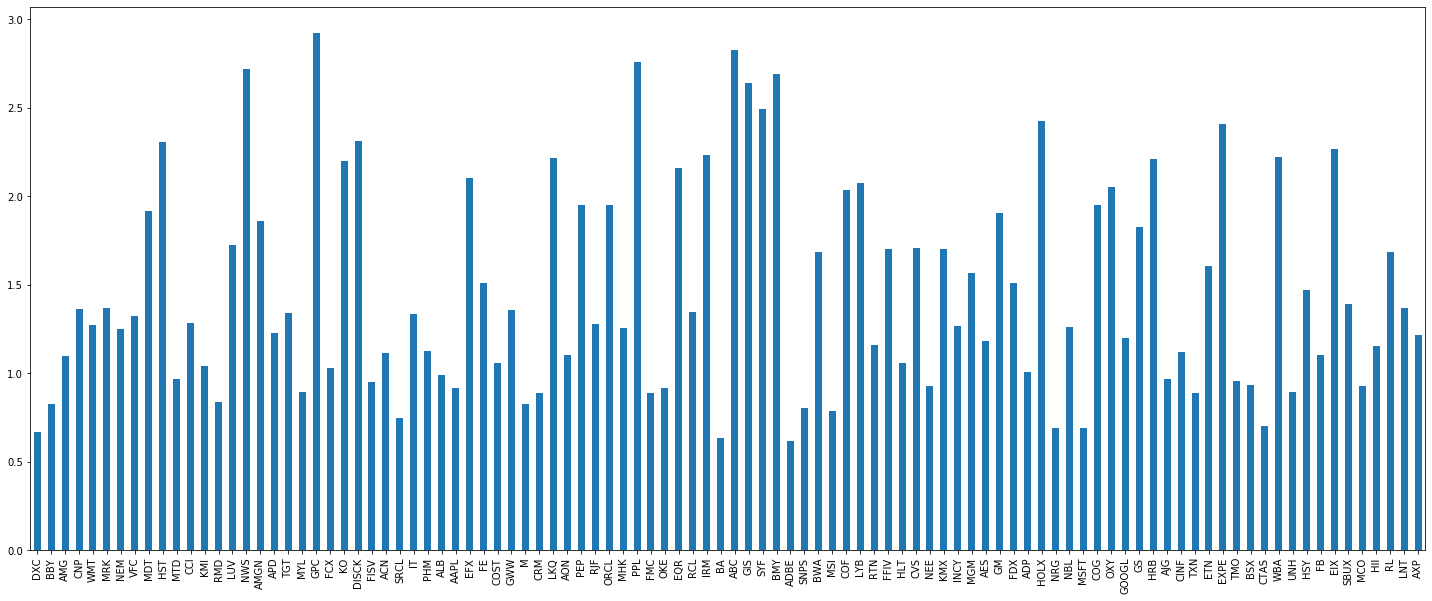

In [20]:
sharpe_ratio.plot(kind='bar', figsize=(25,10))

In [37]:
ffm_csv_path = Path('F-F_Research_Data_Factors.csv')
ffm_data = pd.read_csv(ffm_csv_path, index_col='Date')
ffm_data

,Mkt-RF,SMB,HML,RF
Date,,,,
3/31/15,-1.12,3.03,-0.46,0.00
4/30/15,0.59,-2.98,1.85,0.00
5/31/15,1.36,0.87,-1.37,0.00
6/30/15,-1.53,2.83,-0.79,0.00
7/31/15,1.54,-4.15,-4.12,0.00
8/31/15,-6.04,0.49,2.66,0.00
9/30/15,-3.08,-2.64,0.53,0.00
10/31/15,7.75,-1.97,-0.07,0.00
11/30/15,0.56,3.64,-0.51,0.00


In [32]:
reg = linear_model.LinearRegression()
reg.fit(ffm_data[['SMB','HML','RF']],daily_returns.AAPL)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
reg.coef_

array([ 0.00493159, -0.00134568,  0.15507276])

In [34]:
reg.intercept_

0.005987941199856631